In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read and Check Data

In [2]:
data = pd.read_csv('student-mat.csv')

In [42]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [43]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
cat =[]
num =[]
for i in data.columns:
    if data[i].dtype==object:
        cat.append(i)
    else:
        num.append(i)
        
print("Categorical Features:{}".format(cat),end="\n\n")
print("Numerical Features:{}".format(num))

Categorical Features:['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Numerical Features:['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Alc']


In [50]:
print('Total Missing Values :', sum(data.isnull().sum()))

Total Missing Values : 0


In [4]:
Q1=data.G3.quantile(q=0.25)
Q3=data.G3.quantile(q=0.75)
IQR=Q3-Q1
print('upper limit for outlier:\n',any(data.G3>Q3+1.5*IQR))
print('lower limit for outlier:\n',any(data.G3<Q1-1.5*IQR))

upper limit for outlier:
 False
lower limit for outlier:
 False


## Weekly Alcohol Consumption

In [8]:
data['Alc'] = data['Dalc'] + data['Walc']

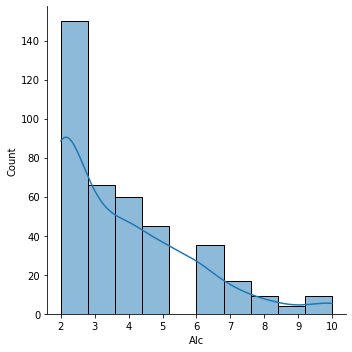

In [66]:
sns.displot(data['Alc'], kde=True)

Every student in this sample drinks.

Most students drink once a week.

Few students drink more than seven times a week.

## How Alcohol Consumption and Final Grade are related

<AxesSubplot:xlabel='Alc', ylabel='G3'>

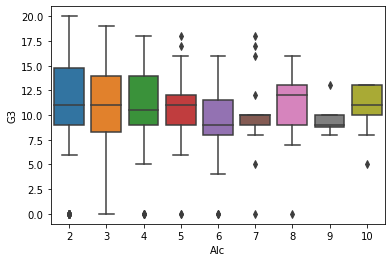

In [9]:
sns.boxplot(data=data, x='Alc', y='G3')

Grade will obviously decrease if students drink more than three times a week.

## How Age and Sex affect Grade and Alcohol Consumption

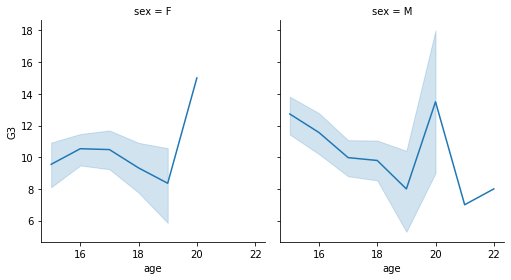

In [52]:
g = sns.FacetGrid(data, col='sex', height=4, aspect=.9)
ax1 = g.map(sns.lineplot, 'age', 'G3', palette = "Blues_d")                                                                                                                                    

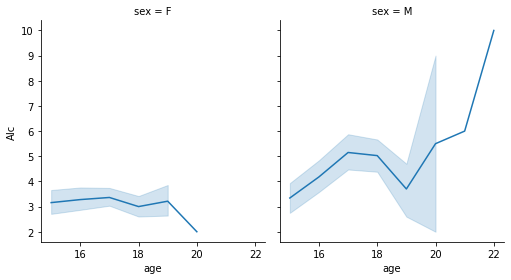

In [68]:
h = sns.FacetGrid(data, col='sex', height=4, aspect=.9)
ax2 = h.map(sns.lineplot, 'age', 'Alc', palette = "Blues_d")

There's a nagative relationship between female alcohol consumption and grade, and women who are 19 year-old drink most.

Men at 17 to 20 age drink more while their grades are better.



## How Parents and Alcohol Consumption affect Grade 

<AxesSubplot:xlabel='Alc', ylabel='G3'>

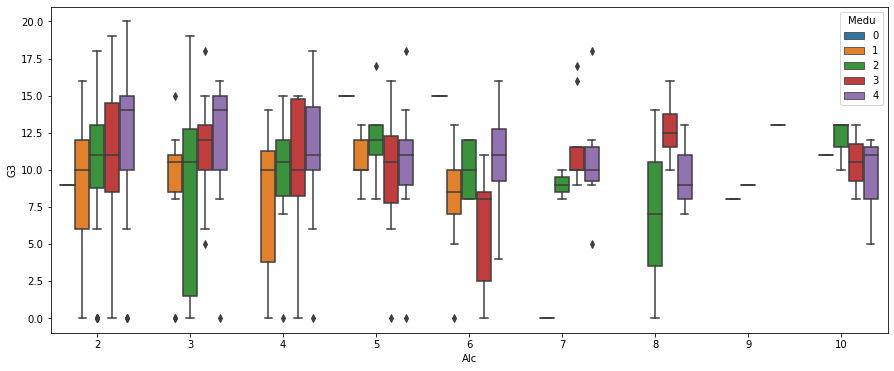

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Alc', y='G3', data=data, hue='Medu')

There is no obvious relationship between alcohol consumption and grade for students' parents with low education.

Students whose parents have a high education tend to get a low grade when they drink a lot.

<AxesSubplot:xlabel='Alc', ylabel='G3'>

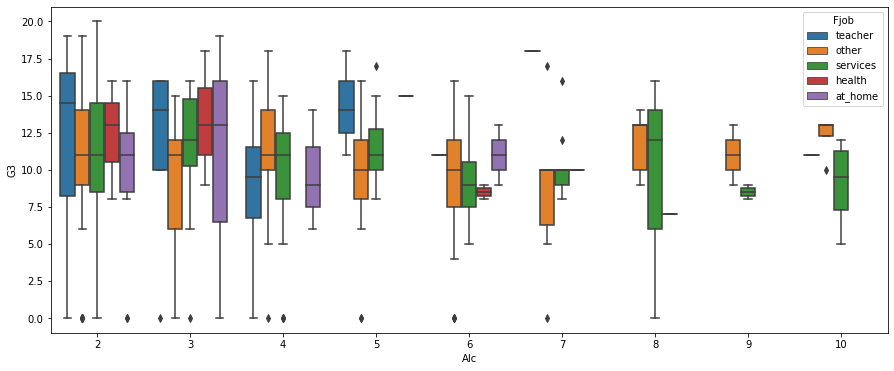

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Alc', y='G3', data=data, hue='Fjob')

Students whose parents are teachers and health workers tend to drink least and whose parents working on services drink most.

Children of teachers and health workers are more likely to have good grades.


<AxesSubplot:xlabel='Alc', ylabel='G3'>

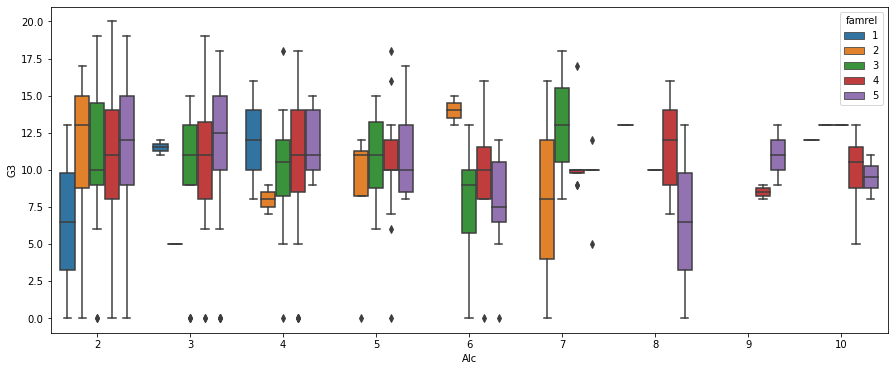

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Alc', y='G3', data=data, hue='famrel')

Students who have an excellent relationship with their parents tend to have a highly negative relationship between alcohol consumption  and grade.

##  How Alcohol Consumption affect Grade under different amounts of time after school¶

<AxesSubplot:xlabel='Alc', ylabel='G3'>

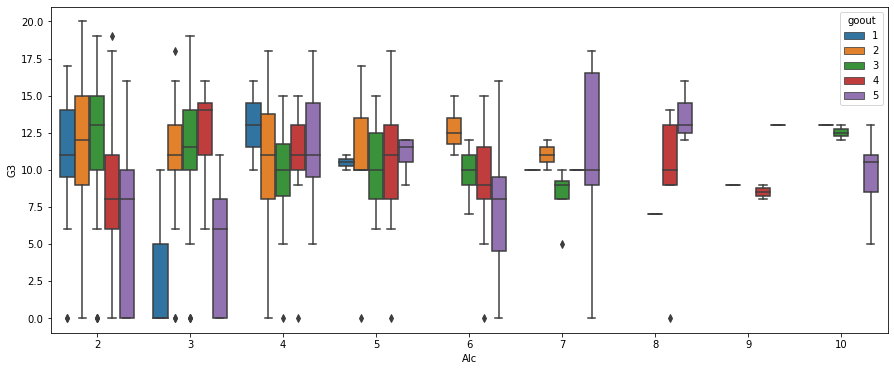

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Alc', y='G3', data=data, hue='goout')

Grade will not be influenced if students drink below four times a week, even though they go out with friends often.

<AxesSubplot:xlabel='Alc', ylabel='G3'>

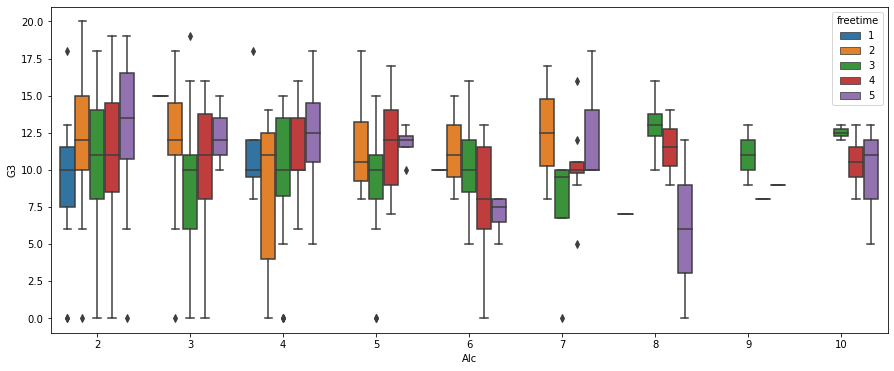

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Alc', y='G3', data=data, hue='freetime')

Alcohol consumption highly correlates with grade for students with a lot of free time.

## Students have desire of further study or not 

<AxesSubplot:xlabel='Alc', ylabel='G3'>

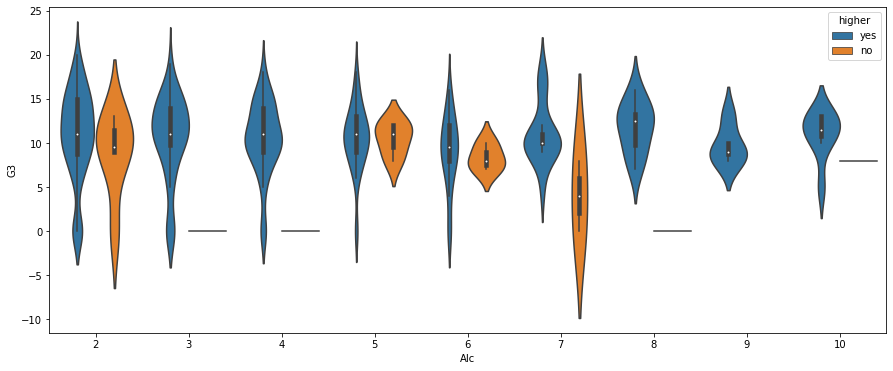

In [22]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Alc', y='G3', data=data, hue='higher')

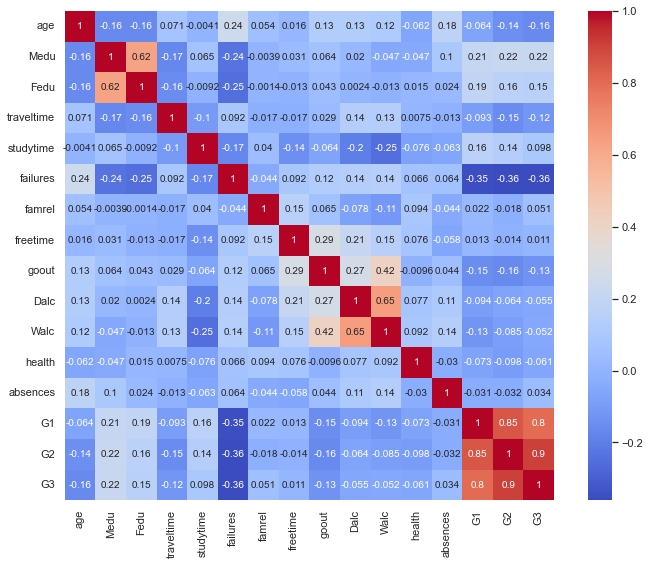

In [60]:
plt.subplots(figsize=(12, 9))
sns.heatmap(data.corr(), square=True, annot=True, annot_kws={'size': 10}, cmap='coolwarm')
sns.set(font_scale=0.5)

In [17]:
corre =[]
corr = data[num].corr()
for i in num:
    for j in num:
        if corr[i][j]>0.5 and i!=j:
            corre.append(i)
            corre.append(j)
corre = list(set(corre))
    
print('correlated columns:{}'.format(corre))

correlated columns:['G3', 'G1', 'Alc', 'Medu', 'G2', 'Fedu', 'Walc', 'Dalc']


It is clear to see that alcohol consumption has correlation with grade of students.